#Importing Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Importing Dataset

In [152]:
train_data = pd.read_csv('/content/train_LZdllcl.csv')
test_data = pd.read_csv('/content/train_LZdllcl.csv')

In [74]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [75]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [76]:
# saving the test set id column as s separate dataframe for future sample submission
id = test_data[['employee_id']]



* Because test data has no target columns



#EDA

In [77]:
train_data.shape

(54808, 14)

In [78]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB




* there are 5 non-numerical columns
* Columns 'education' and 'previous year rating' have null values



In [79]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


<Axes: >

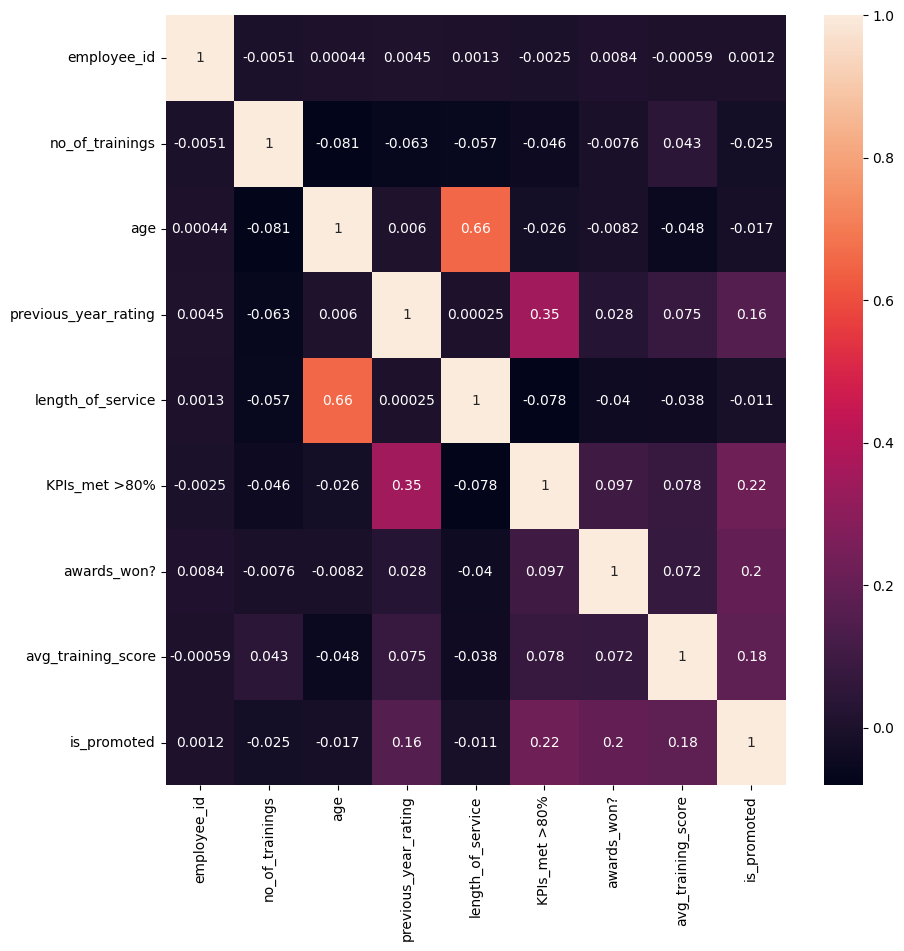

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.select_dtypes('number').corr(), annot=True)



* 'age' and 'length_of_service' have a correlation more than 0.5




#Data Preprocessing

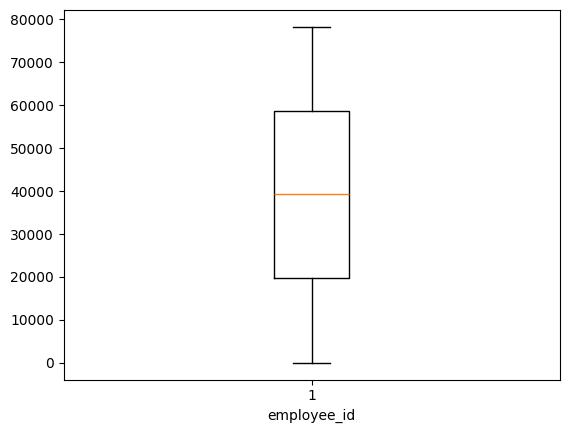

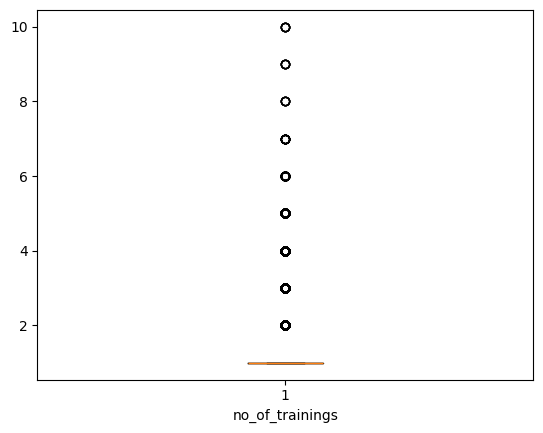

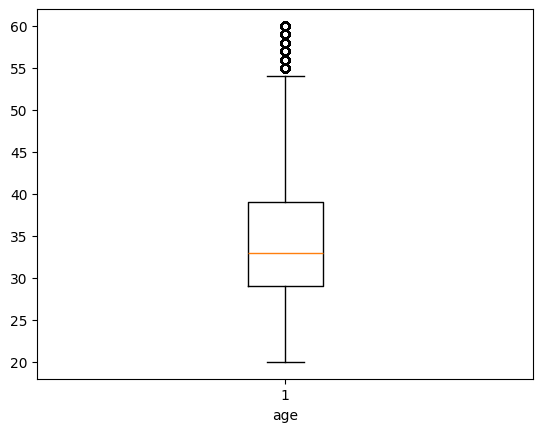

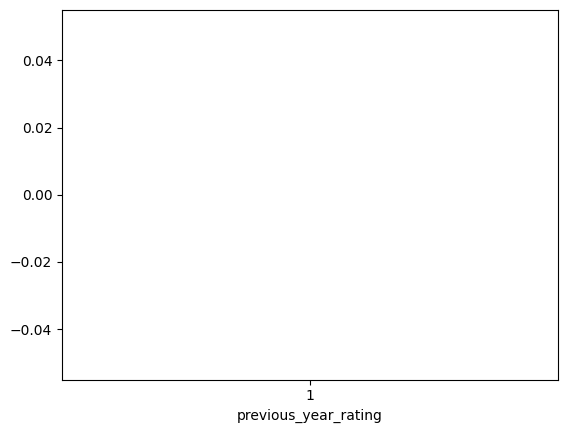

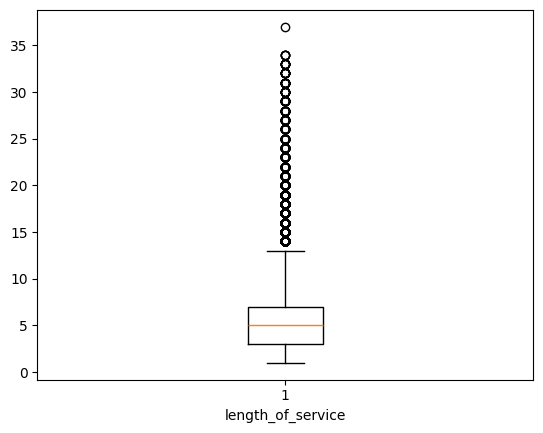

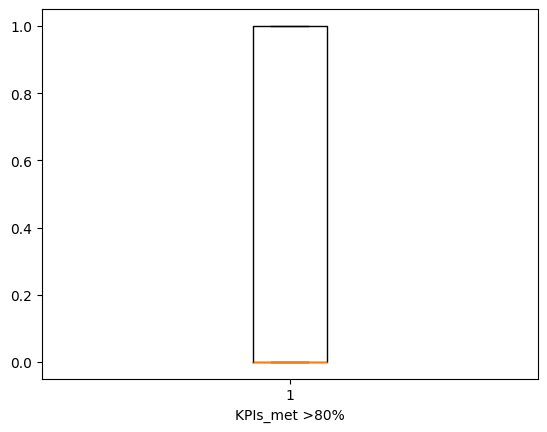

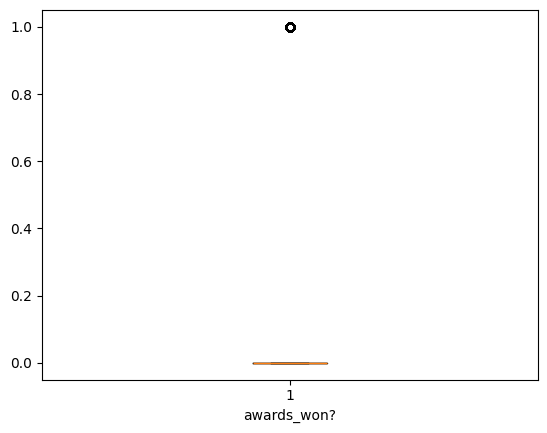

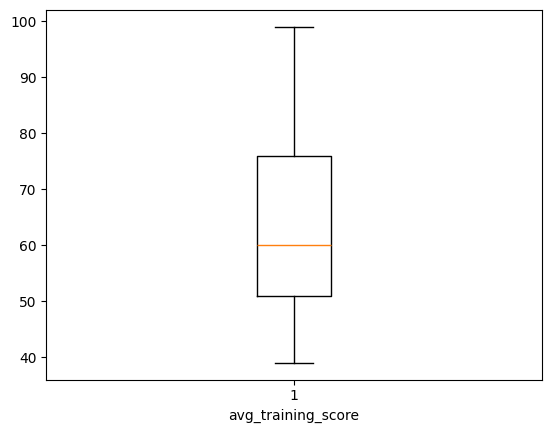

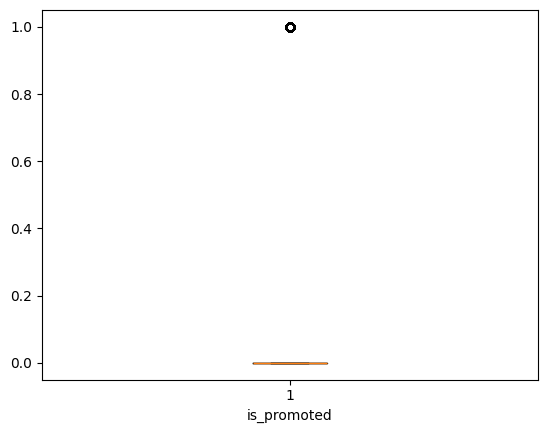

In [81]:
#Outlier Detection
for col in train_data.select_dtypes('number'):
    plt.boxplot(train_data[col])
    plt.xlabel(col)
    plt.show()



* No Visible Outliers



In [82]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [83]:
#Missing Value Handling
train_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [84]:
test_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


#for prev_year_rating column

In [85]:
train_data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [86]:
train_data['previous_year_rating'].median()

3.0

In [87]:
train_data.groupby('KPIs_met >80%')['previous_year_rating'].median()

,previous_year_rating
KPIs_met >80%,
0,3.0
1,4.0


In [88]:
train_data['previous_year_rating'] = train_data.groupby('KPIs_met >80%')['previous_year_rating'].transform(lambda x : x.fillna(x.median()))

In [89]:
train_data['previous_year_rating'].isna().sum()

0

In [90]:
# with test data
test_data['previous_year_rating'] = test_data.groupby('KPIs_met >80%')['previous_year_rating'].transform(lambda x : x.fillna(x.median()))
test_data['previous_year_rating'].isna().sum()

0

#for education column

In [91]:
train_data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [92]:
train_data['education'] = train_data['education'].fillna(train_data['education'].mode()[0])

In [93]:
train_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [94]:
# For test data
test_data['education'] = test_data['education'].fillna(test_data['education'].mode()[0])
test_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [95]:
#Encoding
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [96]:
for col in train_data.select_dtypes('object'):
    print(col)
    print(train_data[col].unique())
    print()

department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

region
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']

education
["Master's & above" "Bachelor's" 'Below Secondary']

gender
['f' 'm']

recruitment_channel
['sourcing' 'other' 'referred']



In [97]:
# For test data
for col in test_data.select_dtypes('object'):
    print(col)
    print(test_data[col].unique())
    print()

department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

region
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']

education
["Master's & above" "Bachelor's" 'Below Secondary']

gender
['f' 'm']

recruitment_channel
['sourcing' 'other' 'referred']



In [98]:
#region Column(train data)
encoder = OrdinalEncoder(dtype= np.int64)
train_data['region'] = encoder.fit_transform(train_data[['region']])

In [99]:
#region Column(test data)
test_data['region'] = encoder.transform(test_data[['region']])

In [100]:
# Department column(train data)
train_data['department'] = encoder.fit_transform(train_data[['department']])

In [101]:
# Department column(test data)
test_data['department'] = encoder.transform(test_data[['department']])

In [102]:
#Enoding the other cols using One hot (train data)
encoder = OneHotEncoder(sparse_output=False)
for col in ['education', 'gender','recruitment_channel']:
    sample = encoder.fit_transform(train_data[[col]])
    df = pd.DataFrame(sample, columns= encoder.get_feature_names_out())
    train_data = pd.concat([train_data, df], axis=1)

In [103]:
#Enoding the other cols using One hot(test data)
for col in ['education', 'gender','recruitment_channel']:
    sample = encoder.fit_transform(test_data[[col]])
    df = pd.DataFrame(sample, columns= encoder.get_feature_names_out())
    test_data = pd.concat([test_data, df], axis=1)

In [104]:
test_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,7,31,Master's & above,f,sourcing,1,35,5.0,8,...,49,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,65141,4,14,Bachelor's,m,other,1,30,5.0,4,...,60,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7513,7,10,Bachelor's,m,sourcing,1,34,3.0,7,...,50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2542,7,15,Bachelor's,m,other,2,39,1.0,10,...,50,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,48945,8,18,Bachelor's,m,other,1,45,3.0,2,...,73,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,Bachelor's,m,sourcing,1,48,3.0,17,...,78,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54804,74592,4,19,Master's & above,f,other,1,37,2.0,6,...,56,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
54805,13918,0,0,Bachelor's,m,other,1,27,5.0,3,...,79,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54806,13614,7,33,Bachelor's,m,sourcing,1,29,1.0,2,...,45,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [105]:
#dropping unneccary columns in the data
train_data = train_data.drop(['employee_id','gender', 'recruitment_channel', 'education'], axis=1)
test_data = test_data.drop(['employee_id','gender', 'recruitment_channel', 'education'], axis=1)

In [106]:
train_data

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,7,31,1,35,5.0,8,1,0,49,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,4,14,1,30,5.0,4,0,0,60,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7,10,1,34,3.0,7,0,0,50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,7,15,2,39,1.0,10,0,0,50,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,8,18,1,45,3.0,2,0,0,73,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,1,48,3.0,17,0,0,78,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54804,4,19,1,37,2.0,6,0,0,56,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
54805,0,0,1,27,5.0,3,1,0,79,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54806,7,33,1,29,1.0,2,0,0,45,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [107]:
test_data

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,7,31,1,35,5.0,8,1,0,49,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,4,14,1,30,5.0,4,0,0,60,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7,10,1,34,3.0,7,0,0,50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,7,15,2,39,1.0,10,0,0,50,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,8,18,1,45,3.0,2,0,0,73,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,1,48,3.0,17,0,0,78,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54804,4,19,1,37,2.0,6,0,0,56,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
54805,0,0,1,27,5.0,3,1,0,79,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54806,7,33,1,29,1.0,2,0,0,45,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [108]:
#Feature Target Split
x_train = train_data.drop('is_promoted', axis = 1)
y_train = train_data['is_promoted']

In [109]:
x_test = test_data.values

In [110]:
y_train.value_counts()

,count
is_promoted,
0,50140
1,4668


In [119]:
# Standard Scaling
numerical_cols = ['age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
scaler = StandardScaler()

# Fit and transform on training data
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])

# Transform test data using the same scaler
x_test = pd.DataFrame(x_test, columns=test_data.columns)
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])


In [122]:
x_test = x_test.drop('is_promoted', axis=1)

#Logistic Regression

In [124]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
submission = pd.DataFrame({'employee_id': id['employee_id'], 'is_promoted': y_pred})

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#SVM

In [125]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
submission = pd.DataFrame({'employee_id': id['employee_id'], 'is_promoted': y_pred})

#Naive Bayes

In [126]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
submission = pd.DataFrame({'employee_id': id['employee_id'], 'is_promoted': y_pred})

#Decision Tree

In [127]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
submission = pd.DataFrame({'employee_id': id['employee_id'], 'is_promoted': y_pred})

#Random Forest

In [128]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
submission = pd.DataFrame({'employee_id': id['employee_id'], 'is_promoted': y_pred})

#KNN

In [129]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
submission = pd.DataFrame({'employee_id': id['employee_id'], 'is_promoted': y_pred})

#ADA Boost

In [130]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
submission = pd.DataFrame({'employee_id': id['employee_id'], 'is_promoted': y_pred})

#Gradient Boost

In [131]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
submission = pd.DataFrame({'employee_id': id['employee_id'], 'is_promoted': y_pred})

# Bagging Classifier

In [132]:
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)
y_pred = bagging.predict(x_test)
submission = pd.DataFrame({'employee_id': id['employee_id'], 'is_promoted': y_pred})

In [133]:
bagging.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [134]:
#Checking the f1 score of training data
cross_val_score(bagging, X= x_train, y= y_train, cv=5, scoring='f1')

array([0.47686833, 0.46043165, 0.47666906, 0.48927039, 0.46872753])

In [136]:
sample_sub = np.concatenate([id, y_pred.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])
sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Bagging.csv', index=False)

#Fine Tuning

#Decision Tree

In [138]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [None, 100, 1000, 10000],
    'min_samples_leaf': [1,2,3,4,5,6],
    'min_samples_split' : [2,3,4,5],
    'max_features': [None,2,4,5,6,10,12],
    'class_weight' : ['balanced'],
    'ccp_alpha' : [0.0,0.01,0.05,0.1,0.2]

}

tuner = RandomizedSearchCV(estimator= DecisionTreeClassifier(),param_distributions= parameters,
                     n_jobs=4,scoring='f1', cv =5,verbose=4, n_iter=1000)

tuner.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=1000,
                   n_jobs=4,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.05, 0.1,
                                                      0.2],
                                        'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 100, 1000, 10000],
                                        'max_features': [None, 2, 4, 5, 6, 10,
                                                         12],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5]},
                   scoring='f1', verbose=4)

In [139]:
tuner.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 12,
 'max_depth': 1000,
 'criterion': 'log_loss',
 'class_weight': 'balanced',
 'ccp_alpha': 0.0}

In [140]:
tuner.best_score_

0.4349646531141226

In [141]:
tree = DecisionTreeClassifier(min_samples_leaf= 1,
                              min_samples_split=3,
                              max_features=None,
                              max_depth=None,
                              criterion= 'log_loss',
                              class_weight='balanced',
                              ccp_alpha= 0)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
y_pred_tree

array([0, 0, 0, ..., 0, 0, 0])

In [142]:
sample_sub = np.concatenate([id, y_pred_tree.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])
sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Decision_Tree.csv', index=False)

#Bagging Classifier

In [143]:
parameters = {
    'estimator' : [DecisionTreeClassifier()],
    'n_estimators' : [1000,10000,5000,500],
    'max_samples' : [1.0,0.5,0.7],
    'max_features' : [1,2,3,5,8,10,12],
}


tuner = RandomizedSearchCV(estimator= BaggingClassifier(),param_distributions= parameters,
                     n_jobs=4,scoring='f1', cv =2,verbose=4, n_iter=10)

tuner.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=2, estimator=BaggingClassifier(), n_jobs=4,
                   param_distributions={'estimator': [DecisionTreeClassifier()],
                                        'max_features': [1, 2, 3, 5, 8, 10, 12],
                                        'max_samples': [1.0, 0.5, 0.7],
                                        'n_estimators': [1000, 10000, 5000,
                                                         500]},
                   scoring='f1', verbose=4)

In [144]:
tuner.best_params_

{'n_estimators': 5000,
 'max_samples': 1.0,
 'max_features': 12,
 'estimator': DecisionTreeClassifier()}

In [145]:
tuner.best_score_

0.4043136664282039

In [146]:
bagging = BaggingClassifier(estimator= DecisionTreeClassifier(),
                            n_estimators=1000,
                            max_samples=1.0,
                            max_features=12)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)
y_pred_bagging

array([0, 0, 0, ..., 0, 0, 0])

In [147]:
sample_sub = np.concatenate([id, y_pred_bagging.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Bagging.csv', index=False)

#XG Boost

In [148]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)

y_pred_xgb = xgb.predict(x_test)

In [149]:
sample_sub = np.concatenate([id, y_pred_xgb.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\XGB.csv', index=False)

#Sample submission file upload

In [154]:
sample_data = pd.read_csv('/content/sample_submission_M0L0uXE.csv')